In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

df = pd.read_csv("../../dataset/Iris.csv")

df = df.drop('Id', axis=1)
df['Species'] = df['Species'].replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (0, 1, 2))

features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
label = df['Species']

clf = SVC(kernel='rbf', gamma=0.1, C=100)

scores = cross_val_score(clf, features, label, cv=10, verbose=3)

print(scores)


[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.933) total time=   0.0s
[CV] END ................................ score: (test=0.933) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[1.         1.         1.         1.         0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


C:\Users\Muhammad Afiq\AppData\Local\Temp\ipykernel_34252\4098742076.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (0, 1, 2))


In [3]:
from sklearn.datasets import load_wine

wine=load_wine()
x=wine.data
y=wine.target

clf = SVC(kernel='rbf', gamma=0.1, C=100)

scores = cross_val_score(clf, x, y, cv=10, verbose=3)

print(scores)

[CV] END ................................ score: (test=0.333) total time=   0.0s
[CV] END ................................ score: (test=0.389) total time=   0.0s
[CV] END ................................ score: (test=0.444) total time=   0.0s
[CV] END ................................ score: (test=0.389) total time=   0.0s
[CV] END ................................ score: (test=0.444) total time=   0.0s
[CV] END ................................ score: (test=0.389) total time=   0.0s
[CV] END ................................ score: (test=0.444) total time=   0.0s
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] END ................................ score: (test=0.471) total time=   0.0s
[CV] END ................................ score: (test=0.529) total time=   0.0s
[0.33333333 0.38888889 0.44444444 0.38888889 0.44444444 0.38888889
 0.44444444 0.5        0.47058824 0.52941176]


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x)
x_train_mmscaled = scaler_minmax.transform(x)
# x_test_mmscaled = scaler_minmax.transform(x_test)

scores = cross_val_score(clf, x_train_mmscaled, y, cv=10, verbose=3)

print(scores)

[CV] END ................................ score: (test=0.889) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.941) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[0.88888889 0.94444444 0.94444444 0.94444444 1.         0.94444444
 0.94444444 1.         0.94117647 1.        ]


## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter = 1000)

# Train the classifier
logreg.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
print(y_pred)


Accuracy: 0.9666666666666667
[2 2 1 0 1 1 1 1 0 0 2 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 1 0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

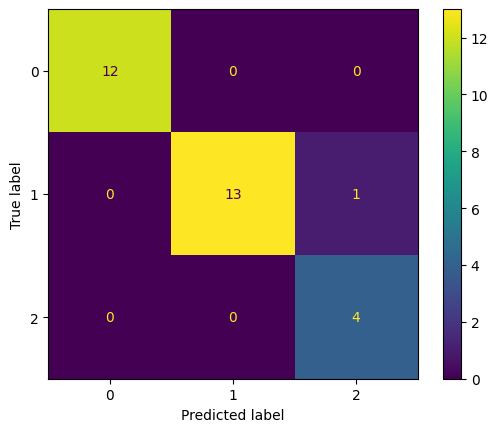

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show

### Logistic Regression with GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0]  # Different inverse regularization strengths
}

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=1000)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the logistic regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params, max_iter=1000)
best_logreg.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = best_logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Accuracy on Cross-Validated Set:", best_score)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'C': 1.0}
Best Accuracy on Cross-Validated Set: 0.975
Accuracy on Test Set: 0.9666666666666667


In [8]:
wine=load_wine()
x=wine.data
y=wine.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
param_grid = {
    'C': [0.1, 1.0, 10.0]  # Different inverse regularization strengths
}

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=10000)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the logistic regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params, max_iter=10000)
best_logreg.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = best_logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Accuracy on Cross-Validated Set:", best_score)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 10.0}
Best Accuracy on Cross-Validated Set: 0.97192118226601
Accuracy on Test Set: 0.9722222222222222


## Wine Quality Dataset

In [9]:
# Read the dataset
wine_df = pd.read_csv("../../dataset/winequality-red.csv")

In [10]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
wine_df.quality.nunique()

6

In [13]:
from collections import Counter
counter = Counter(wine_df.quality)
counter

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [14]:
features = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
label = wine_df['quality']

In [15]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
features_upsample, label_upsample = oversample.fit_resample(features,label)
counter = Counter(label_upsample)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_upsample, 
                                                    label_upsample, 
                                                    test_size=0.1, 
                                                    random_state=123)
param_grid = {
    'C': [0.1, 1.0, 10.0]  # Different inverse regularization strengths
}

In [17]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
x_train_mmscaled = scaler_minmax.transform(X_train)
x_test_mmscaled = scaler_minmax.transform(X_test)

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=50000)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train_mmscaled, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the logistic regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params, max_iter=50000)
best_logreg.fit(x_train_mmscaled, y_train)

# Predict the classes for the test set
y_pred = best_logreg.predict(x_test_mmscaled)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Accuracy on Cross-Validated Set:", best_score)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 10.0}
Best Accuracy on Cross-Validated Set: 0.590149733806566
Accuracy on Test Set: 0.5941320293398533


<function matplotlib.pyplot.show(close=None, block=None)>

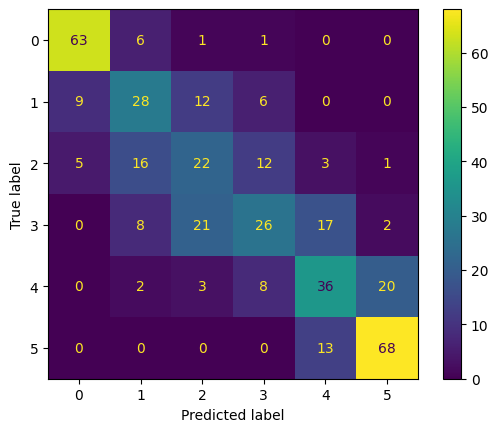

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show

### Classification Conclusion

Step by step:

1. Load the dataset >> df
2. Data preprocessing >> null value, scaler
3. Identifying features and label
4. Train test split >> small 8:2, bigger 9.5:0.5
5. Define classifier >> KNN, SVM, Logistic Regression
6. Model training >> .fit()
7. Model accuracy >> .score, accuracy_score
8. Confusion Matrix
9. Save the model joblib

Additional

1. GridsearchCV to find best parameter
2. Cross validation


# Regression

* Used to predict numerical dependednt variable
* Two types:
  * Linear
      * Simple Linear Regression
      * Multiple Linear Regression
  * Non-Linear

### Simple Linear Regression
- Simple linear equation: `y=mx+c`
- Linear Regression: `y= Bo + B1*x+ u`(Residual)
  - `y` = Actual value
  - `Bo + B1*x` = Predicted Value
 
### Multiple Linear Regression
- Many to One
- More independent variable
- `y - Bo + B1x1 + B2x2+ ... + Bnxn + E`
  - `y` = response
  - `Bo` = Bias
  - `E` = Error

## California housing

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

 

Mean Squared Error: 0.5134798447391083


## Performance Evaluation

**1. Mean Squared Error (MSE)**
    : `MSE = (1/n) * Σ(yi - ŷi)^2`

**2. Root Mean Squared Error (RMSE)**
    : `RMSE = sqrt((1/n) * Σ(yi - ŷi)^2)`
    
**3. Mean Absolute Error (MAE)**
    : `MAE = (1/n) * Σ|yi - ŷi|`

**4. R-squared (R²)**
    : `R² = 1 - (Σ(yi - ŷi)^2) / (Σ(yi - ȳ)^2)`

| Symbol | Description |
|---|---|
| ŷi | prediction or a point on the regression line |
| yi | actual values or the points |
| ȳ  | mean of all values |

**Housing Price**
Encode

In [20]:
import pandas as pd

house_price = pd.read_csv("../../dataset/housedata/data.csv")

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
house_price['statezip_encode'] = le.fit_transform(house_price['statezip'])
house_price['city_encode'] = le.fit_transform(house_price['city'])

In [22]:
house_price.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,statezip_encode,city_encode
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,62,36
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,58,35
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26,18
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,7,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,31,31


In [23]:
house_price_filtered = house_price.drop(['date', 'country', 'city', 'statezip', 'street'], axis=1)
house_price_filtered.dtypes

price              float64
bedrooms           float64
bathrooms          float64
sqft_living          int64
sqft_lot             int64
floors             float64
waterfront           int64
view                 int64
condition            int64
sqft_above           int64
sqft_basement        int64
yr_built             int64
yr_renovated         int64
statezip_encode      int64
city_encode          int64
dtype: object

In [24]:
features=house_price_filtered[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors',
                               'waterfront', 'view', 'condition', 'sqft_above','sqft_basement',
                               'yr_built', 'yr_renovated','statezip_encode', 'city_encode']]

label = house_price_filtered['price']

In [25]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_encode,city_encode
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,62,36
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,58,35
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26,18
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,7,3
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,62,35
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,6,3
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,37,32
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,71,35


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.1,
                                                    random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

55042233103.17658
0.5718801769916587


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

model = LinearRegression()

gridsearch = GridSearchCV(model, param_grid, cv=5, verbose=3)

gridsearch.fit(x_train, y_train)

y_pred = gridsearch.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END copy_X=True, fit_intercept=True, positive=True;, score=0.022 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, positive=True;, score=0.574 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, positive=True;, score=0.431 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, positive=True;, score=0.458 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, positive=True;, score=0.505 total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, positive=False;, score=0.020 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, positive=False;, score=0.615 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, positive=False;, score=0.444 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, positive=False;, score=0.498 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, positive=False;, score=0.543 total time=   0.0s
[CV 1